- [ ] *Business Problem:*
  - [ ] 1.1 Background
  - [ ] 1.2 Problem Statement

- [ ] *Import Libraries*

- [ ] *Data Exploration:*
  - [ ] 3.1 Data Fields

- [ ] *Data Preparation:*
  - [ ] 4.1 Missing Values
    - [ ] 4.1.1 `tunir`
    - [ ] 4.1.2 Model reiteration-parameter `tuni`
    - [ ] 4.1.3 `permit`
    - [ ] 4.1.4 `construction year`
  - [ ] 4.2 Replace misspellings and group smaller categories
    - [ ] 4.2.1 Reformat `Installer` column
    - [ ] 4.2.2 Reformat `Funder` column
    - [ ] 4.2.3 Group Other Remaining Columns
      - [ ] 4.2.3.1 Iga
  - [ ] 4.3 Columns to drop
    - [ ] 4.3.1 Mostly Empty
    - [ ] 4.3.2 Many Individual Values
    - [ ] 4.3.3 Not Significant
      - [ ] 4.3.3.1 The features scheme manage
    - [ ] 4.3.4 Categorical and Numerical
  - [ ] 4.4 Join Target: `df_train` set to `df_train`
  - [ ] 4.5 Column Binning
  - [ ] 4.6 Clean Target
  - [ ] 4.7 Visualizations

- [ ] *Train Test Split*

- [ ] *Encode Features*
  - [ ] 6.1 X train Encode
  - [ ] 6.2 X test Encode
  - [ ] 6.3 Delete 'other' columns OHE
    - [ ] 6.3.1 Delete Other Train
    - [ ] 6.3.2 Delete Other Test
  - [ ] 6.4 Label Encode Target

- [ ] *Model Development*
  - [ ] 7.1 Random Forest Classifier
    - [ ] 7.1.1 Check for Overfit
    - [ ] 7.1.2 Feature Importance
    - [ ] 7.1.3 Model reiteration-parameter
  - [ ] 7.2 Gradient Boosting Classifier
    - [ ] 7.2.1 Check for Overfit
  - [ ] 7.3 Logistic Regression
    - [ ] 7.3.1 Unbalanced
    - [ ] 7.3.2 Balanced
    - [ ] 7.3.3 Check for Overfit
    - [ ] 7.3.4 Model reiteration - parameter tuning

# 1 Business Problem:

## 1.1 Problem statement
* The inadequate provision of clean water in Tanzania poses a significant challenge for the country's population of over 57 million. The existing waterpoints in Tanzania include wells that are in need of repair or have completely failed. To address this issue, there is a need to develop a classifier that can predict the condition of water wells based on various factors such as the type of pump used, installation date, and other relevant information._


* The business problem at hand is to create a robust classifier that can accurately classify the condition of water wells in Tanzania into three categories: wells in need of repair, failed wells, and wells that are in good condition. This classifier can be valuable for decision-makers, government bodies, and non-profit organizations working towards providing clean and sustainable water solutions in Tanzania._

* By accurately predicting the condition of water wells, stakeholders can prioritize repair and maintenance efforts, allocate resources effectively, and implement preventive measures to ensure a reliable supply of clean water to the population. Additionally, the classifier can assist in identifying patterns and factors that contribute to the deterioration of water wells, allowing for targeted interventions and long-term planning to improve the overall water infrastructure in Tanzania.

Here i will have to write the features I will be using to create the model.

# 2  Importing the libraries required for the project.

In [6]:
# Importing the libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


# 3 Data Exploration.

_We will be predicting 3 classes based on a number of variables._
_The information provided below is for the waterpoints  as used for the analysis._

1. date_recorded — The date the row was entered
2. region_code — Geographic location code (region)
3. lga — Geographic location (local government area)
4. quantity_group — Grouped category of water quantity (duplicates "quantity")
5. subvillage — Geographic location (sub-village)
6. construction_year — Year the waterpoint was constructed
7. basin — Geographic water basin
8. water_quality — Quality of the water
9. ward — Geographic location (ward)
10. extraction_type_group — Grouped category of extraction types
11. funder — Who funded the well
12. payment_type — Type of payment for the water
13. scheme_management — Entity responsible for operating the waterpoint
14. num_private — No information
15. source_class — Class of water source
16. quantity — Quantity of water
17. wpt_name — Name of the waterpoint if there is one
18. payment — Cost/payment for the water
19. population — Population around the well
20. management_group — Grouped category of management types
21. gps_height — Altitude of the well
22. source_type — Type of water source
23. extraction_type — Type of extraction method used by the waterpoint
24. recorded_by — Group entering this row of data
25. region — Geographic location
26. extraction_type_class — Class of extraction types
27. waterpoint_type_group — Grouped category of waterpoint types
28. source — Source of the water
29. management — How the waterpoint is managed
30. permit — If the waterpoint is permitted
31. scheme_name — Name of the scheme operating the waterpoint
32. longitude — GPS coordinate
33. quality_group — Grouped category of water quality
34. installer — Organization that installed the well
35. waterpoint_type — Kind of waterpoint
36. district_code — Geographic location code (district)
37. amount_tsh — Total static head (zero for open tanks and closed circulatory systems)
38. latitude — GPS coordinate
39. public_meeting — True/False


In [7]:
# Importing the testing  dataset
df_test = pd.read_csv('data1\Test-set-values.csv')

In [8]:
# importing the training dataset
df_train = pd.read_csv('data1\Training-set-values.csv')
df_train_labels = pd.read_csv('data1\Training-set-labels.csv')

In [9]:
df_train


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [10]:
# check the information of the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
# check for the class labels
df_train_labels[['status_group']].value_counts(normalize=True)

status_group           
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
dtype: float64

In [12]:
# checking for label information
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


| Status Group             | Percentage  |
|--------------------------|-------------|
| Functional               | 54.31%      |
| Non Functional           | 38.42%      |
| Functional Needs Repair  | 7.27%       |

Most of the wells are functional yet another large percentage of the wells are non functional which means there are alot of water issues in the country at hand at the moment.

### We need to know the most frequent values for each column in training data
 

In [13]:
# We need to know the most frequent values for each column with column name in training data

for column in df_train.columns:
    print(column, "\n", df_train[column].value_counts(normalize=True))

id 
 69572    0.000017
27851    0.000017
6924     0.000017
61097    0.000017
48517    0.000017
           ...   
59036    0.000017
56446    0.000017
3855     0.000017
52786    0.000017
26348    0.000017
Name: id, Length: 59400, dtype: float64
amount_tsh 
 0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64
date_recorded 
 2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
                ...   
2011-09-11    0.000017
2011-08-31    0.000017
2011-09-21    0.000017
2011-08-30    0.000017
2013-12-01    0.000017
Name: date_recorded, Length: 356, dtype: float64
funder 
 Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
W

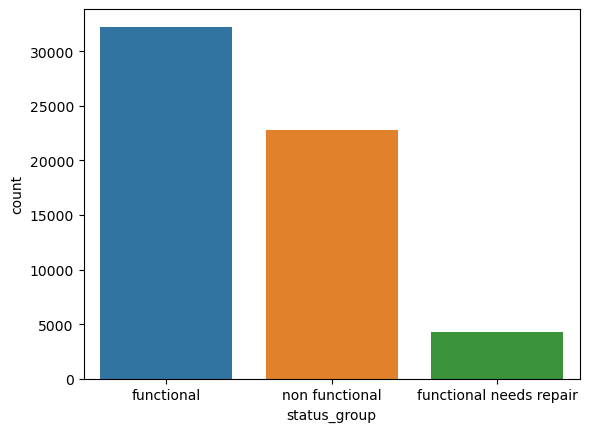

In [14]:
# plot the status group of the water points
sns.countplot(x='status_group', data=df_train_labels)
plt.show()

# Data Preparation


#### Data Preparation involves the following steps and parameters:

- Data Cleaning: Identify and handle missing values, outliers, and inconsistencies in the data. This can involve imputing missing values, removing outliers, and correcting errors or inconsistencies.

- Feature Selection: Choose relevant features (columns) for analysis or modeling. Remove unnecessary or redundant features that do not contribute much to the analysis or model performance.

- Feature Encoding: Convert categorical variables into numerical representations to enable their use in mathematical models. Common encoding techniques include one-hot encoding, label encoding, and ordinal encoding.

- Feature Scaling: Normalize or standardize numerical features to bring them to a similar scale. This ensures that features with different ranges do not disproportionately influence the analysis or model.

- Data Transformation: Apply transformations to the data to meet modeling assumptions or improve model performance. Examples include log transformations, power transformations, or normalization.

- Handling Imbalanced Data: Address class imbalance if present, especially in classification problems, by applying techniques such as oversampling, undersampling, or using ensemble methods.

- Splitting Data: Divide the dataset into training, validation, and test sets. The training set is used for model training, the validation set for model tuning, and the test set for evaluating the final model's performance.

- Handling Time-Series Data: If working with time-series data, consider resampling, lagging variables, or creating time-based features to capture temporal patterns.

- Data Integration: If working with multiple datasets, merge or join them based on common identifiers or keys.

- Data Normalization: Normalize the data to ensure consistent units and scales across different features, especially when dealing with diverse measurement units.


### 1 Data cleaning

#### Dealing with missing values.

In [15]:
# Checking for the missing values in the training dataset
df_train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [16]:
# identify and listing the columns with missing values greater than zero in the training dataset
list(df_train.columns[df_train.isnull().any()])


['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [17]:

# missing values percentage'
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Create a new DataFrame to store the results
missing_data = pd.DataFrame({'Column': df_train.columns, 'Missing Percentage': missing_percentage})

# Sort the DataFrame by the missing percentage in descending order
missing_data = missing_data.sort_values('Missing Percentage', ascending=False)

# Print the missing data information
print(missing_data)


                                      Column  Missing Percentage
scheme_name                      scheme_name           47.417508
scheme_management          scheme_management            6.526936
installer                          installer            6.153199
funder                                funder            6.119529
public_meeting                public_meeting            5.612795
permit                                permit            5.144781
subvillage                        subvillage            0.624579
management_group            management_group            0.000000
waterpoint_type              waterpoint_type            0.000000
extraction_type              extraction_type            0.000000
extraction_type_group  extraction_type_group            0.000000
source_class                    source_class            0.000000
extraction_type_class  extraction_type_class            0.000000
management                        management            0.000000
source_type              

|           Column          | Missing Percentage |
|:-------------------------|------------------:|
|       scheme_name        |       47.417508    |
|   scheme_management  |        6.526936      |
|       installer               |         6.153199      |
|         funder                 |         6.119529      |
|   public_meeting         |        5.612795       |
|          permit               |        5.144781       |
|      subvillage              |        0.624579       |
|  management_group   |        0.000000       |
|    waterpoint_type     |        0.000000       |
|   extraction_type        |        0.000000       |
| extraction_type_group |        0.000000       |
|     source_class          |        0.000000       |
| extraction_type_class |        0.000000       |
|     management             |        0.000000       |
|    source_type              |        0.000000       |
|           source             |        0.000000       |
|     payment_type         |        0.000000       |
|   water_quality          |        0.000000       |
| construction_year      |        0.000000       |
|    quality_group         |        0.000000       |
|         quantity             |        0.000000       |
|   quantity_group       |        0.000000       |
|         payment               |        0.000000       |
|             id                    |        0.000000       |
|     amount_tsh           |        0.000000       |
|     recorded_by            |         0.000000       |
|    population               |         0.000000       |
|           ward                |         0.000000       |
|            lga                  |         0.000000       |
|  district_code             |         0.000000       |
|      region_code          |         0.000000       |
|          region              |         0.000000       |
|            basin              |         0.000000       |
|     num_private          |         0.000000       |
|         wpt_name            |         0.000000       |
|         latitude              |         0.000000       |
|         longitude           |         0.000000       |
|      gps_height           |         0.000000       |
|   date_recorded          |         0.000000       |
|waterpoint_type_group |         0.000000       |


## Mode Imputation.

### Understanding the columns with missing values in the data

In [18]:
columns_with_missing_values = df_train.columns[df_train.isnull().any()]
print(columns_with_missing_values)


Index(['funder', 'installer', 'subvillage', 'public_meeting',
       'scheme_management', 'scheme_name', 'permit'],
      dtype='object')


#### Dealing with schema names column

In [19]:
# Dealing with schema names column
# We will drop the column as it is not useful for our analysis
df_train.drop(['scheme_name'], axis=1, inplace=True)

#### Dealing with scheme management column.


In [20]:
# dealing with scheme management column
# We will replace the missing values with the most frequent value
df_train['scheme_management'].fillna(df_train['scheme_management'].mode()[0], inplace=True)

#### Dealing with installer column.

In [21]:
# Dealing with installer column
# We will replace the missing values with the most frequent value
df_train['installer'].fillna(df_train['installer'].mode()[0], inplace=True)

# Dealing with funder column.

In [22]:
# Dealing with funder column
# We will replace the missing values with the most frequent value
df_train['funder'].fillna(df_train['funder'].mode()[0], inplace=True)


#### Dealing with public meeting column.


In [23]:
# Dealing with public_meeting column
# We will replace the missing values with the most frequent value
df_train['public_meeting'].fillna(df_train['public_meeting'].mode()[0], inplace=True)

#### Dealing with permit column.

In [24]:
# Dealing with permit column
# We will replace the missing values with the most frequent value
df_train['permit'].fillna(df_train['permit'].mode()[0], inplace=True)

#### Dealing with sub_village.

In [25]:
# Dealing with subvillage column
# We will replace the missing values with the most frequent value
df_train['subvillage'].fillna(df_train['subvillage'].mode()[0], inplace=True)

In [26]:
# Checking for the missing values in the training dataset
df_train.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [27]:
# A function for sorting construction year column
def construction_year_sorter(construction_year):
    if construction_year < 1960:
        return "Before 1960"
    elif construction_year >= 1960 and construction_year < 1970:
        return "1960s"
    elif construction_year >= 1970 and construction_year < 1980:
        return "1970s"
    elif construction_year >= 1980 and construction_year < 1990:
        return "1980s"
    elif construction_year >= 1990 and construction_year < 2000:
        return "1990s"
    elif construction_year >= 2000 and construction_year < 2010:
        return "2000s"
    else:
        return "2010s"


In [28]:
# checking the construction year column
df_train['construction_year'].value_counts()


0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

### Dealing with outliers

In [29]:
#Checking for outliers in the training dataset
df_train.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [30]:
# Dealing with outliers in the training dataset
 We will use the interquartile range method to deal with the outliers#
# We will use the boxplot to visualize the outliers
# We will use the z-score to remove the outliers


IndentationError: unexpected indent (3467295242.py, line 2)

In [ ]:
# We will use the interquartile range method to deal with the outliers
def remove_outliers(df_train, column_name):
    q1 = df_train[column_name].quantile(0.25)
    q3 = df_train[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df_train = df_train[(df_train[column_name] > lower_bound) & (df_train[column_name] < upper_bound)]
    return df_train

_ Features "amount_tsh," "gps_height," "longitude," "latitude," "num_private," "region_code," "district_code," "population" and "construction_year" are the numerical features._

<AxesSubplot:xlabel='population'>

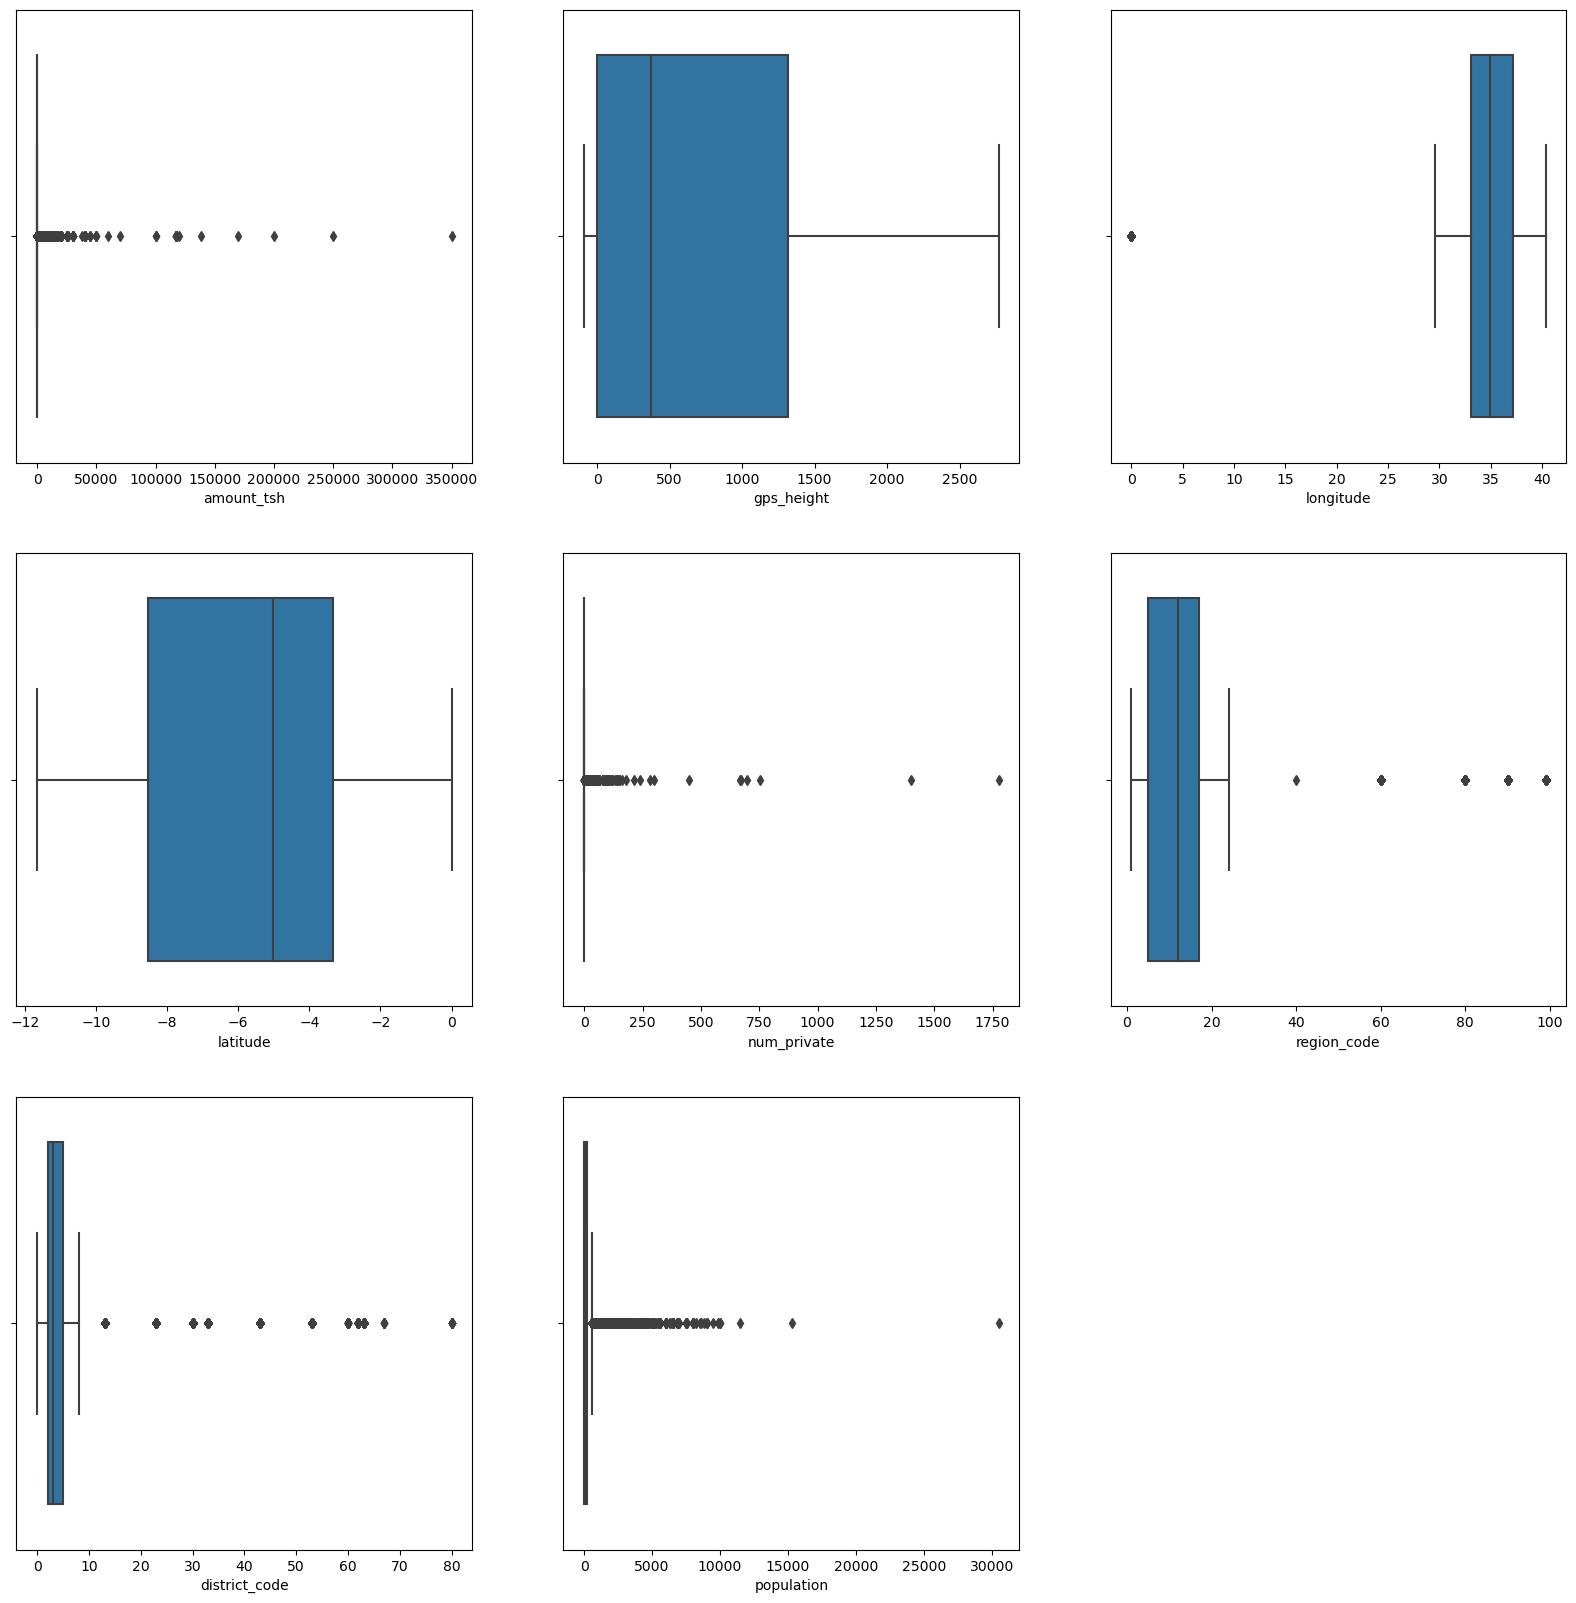

In [33]:
# Create an individual  box plot to visualize the outliers in numerical columns
plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
sns.boxplot(df_train['amount_tsh'])
plt.subplot(3, 3, 2)
sns.boxplot(df_train['gps_height'])
plt.subplot(3, 3, 3)
sns.boxplot(df_train['longitude'])
plt.subplot(3, 3, 4)
sns.boxplot(df_train['latitude'])
plt.subplot(3, 3, 5)
sns.boxplot(df_train['num_private'])
plt.subplot(3, 3, 6)
sns.boxplot(df_train['region_code'])
plt.subplot(3, 3, 7)
sns.boxplot(df_train['district_code'])
plt.subplot(3, 3, 8)
sns.boxplot(df_train['population'])



In [38]:


# Visualizing the wells on the Tanzanian map
# We will use the longitude and latitude columns
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', data=df_train, hue='status_group')
plt.show()


ValueError: Could not interpret value `status_group` for parameter `hue`

<Figure size 1000x1000 with 0 Axes>

In [31]:
df_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
